Implementing Feedforward neural networks with Keras and TensorFlow for 
classification of  hand-written MNIST dataset using below steps:  
a. Import the necessary packages. 
b. Load the training and testing data.  
c. Define the network architecture using Keras.  
d. Train the model using SGD with 11 epochs. 
e. Evaluate the network.   
f. Plot the training loss and accuracy.

In [1]:
# a. import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical


In [2]:
# b. load the csv data (change filename path if required)
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

# separate label & pixels
y_train = train['label'].values
X_train = train.drop(['label'], axis=1).values

y_test = test['label'].values
X_test = test.drop(['label'], axis=1).values

# normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# one hot encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# c. define network architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model with SGD
opt = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

C:\Users\SHUBHAM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# d. train the model with 11 epochs
history = model.fit(X_train, y_train, validation_split=0.2, epochs=11, batch_size=32)


Epoch 1/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8180 - loss: 0.6933 - val_accuracy: 0.9110 - val_loss: 0.3184
Epoch 2/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9143 - loss: 0.3026 - val_accuracy: 0.9274 - val_loss: 0.2543
Epoch 3/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9300 - loss: 0.2478 - val_accuracy: 0.9381 - val_loss: 0.2210
Epoch 4/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9395 - loss: 0.2123 - val_accuracy: 0.9460 - val_loss: 0.1923
Epoch 5/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9471 - loss: 0.1864 - val_accuracy: 0.9514 - val_loss: 0.1744
Epoch 6/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9526 - loss: 0.1661 - val_accuracy: 0.9538 - val_loss: 0.1628
Epoch 7/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9571 - loss: 0.1501 - val_accuracy: 0.9591 - val_loss: 0.1503
Epoch 8/11
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9613 - loss: 0.1365 - 

In [5]:
# e. evaluate model
loss, acc = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.9666 - loss: 0.1165
Test Loss: 0.11646021902561188
Test Accuracy: 0.9666000008583069


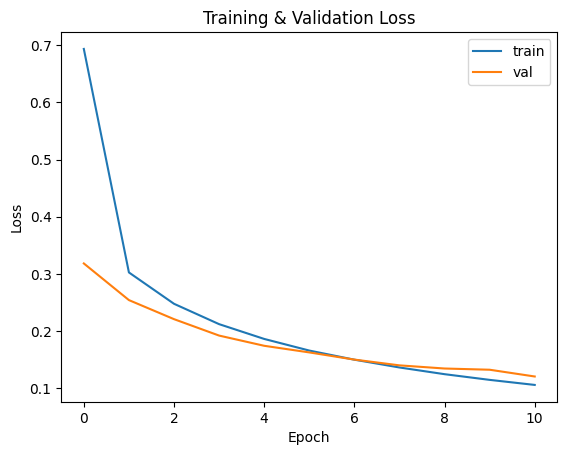

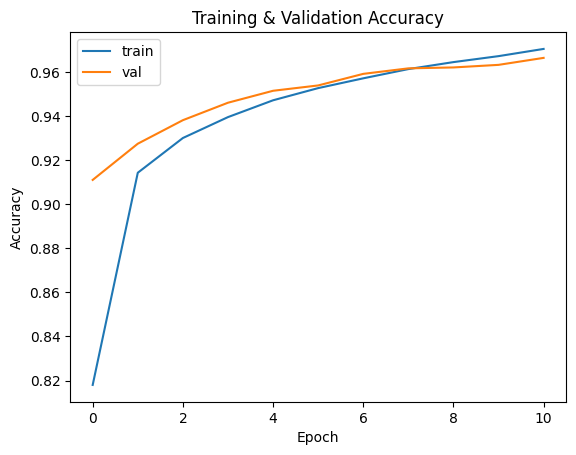

In [6]:
# f. plot loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])
plt.show()

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','val'])
plt.show()